# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. **Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than \$50,000**. This sort of task can arise in a non-profit setting, where organizations survive on donations.  _Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with_.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))
data['income'].describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


count     45222
unique        2
top       <=50K
freq      34014
Name: income, dtype: object

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [4]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']==">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=="<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k*100/float(n_records)

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)
#print greater_percent

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

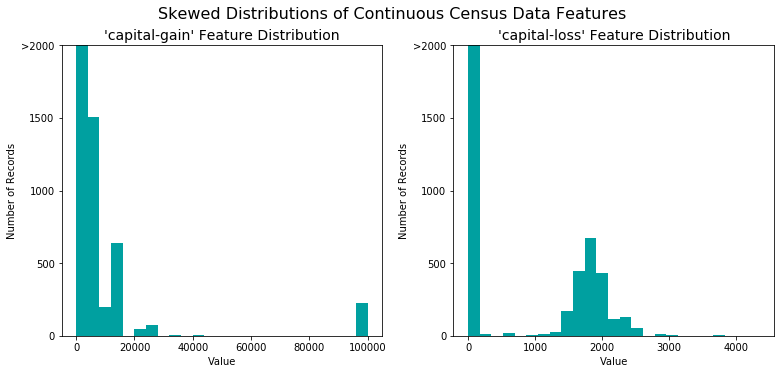

In [5]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: **The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.**

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

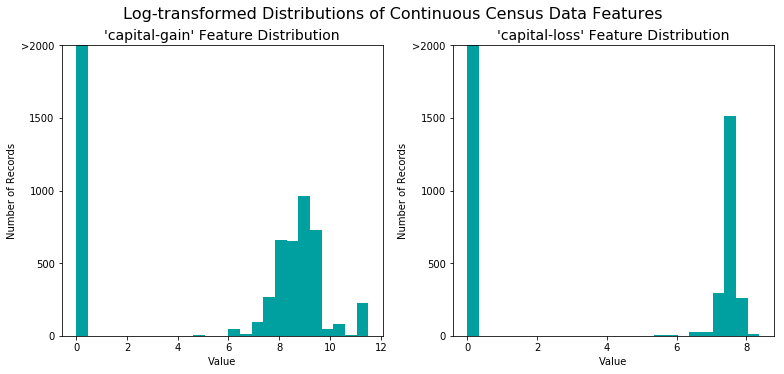

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, **normalization ensures that each feature is treated equally when applying supervised learners**. Note that once scaling is applied, **observing the data in its raw form will no longer have the same original meaning, as exampled below.**

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 2))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [8]:
from sklearn import preprocessing

# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
le = preprocessing.LabelEncoder()
income =pd.Series(le.fit_transform(income_raw))
#type(income)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))
print ""
# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ 

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
# Import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [10]:
# TODO: Calculate accuracy
# from sklearn.metrics import accuracy_score

### if only predict the test set:
# create an array filled with 9045 ones as the results from the model that always
# make prediction as 1
# pred=np.array(np.repeat(1, 9045))
# accuracy = accuracy_score(y_test,pred)
### Or use calculation:
# real_ones=len(y_test[income==1])
# accuracy_test = float(real_ones)/float(len(y_test))

# if predict the whole dataset
accuracy=float(n_greater_50k)/float(n_records)

# TODO: Calculate F-score using the formula above for beta = 0.5

# For the whole dataset
# Recall = True Positive / (True Positive + False Negative)
recall=float(n_greater_50k)/(float(n_greater_50k)+0)
# Precision = True Positive / (True Positive + False Positive)
precision=float(n_greater_50k)/float(n_records)
beta=0.5

fscore = (1+beta**2)*recall*precision/((beta**2*precision)+recall)

# Print the results 

print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **

**Real World Applications**
- **Random Forest:** according to dataaspirant.com, RF has been used in banking sector where the banks analyze the detailed data of their customer to identify the good customers who can take on loans to pay stable long-term interests, as well as the bad customers who can default on the loans. The RF algorithm is also used in stock market to detect stock behavior and the expected returns of buying/selling a stock. ([Polamuri]( http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/))
- **K-Nearest Neighbors:** credit card transaction-inspecting software applications use kNN algorithm to analyze retail register data and detect any unusual pattern indicating suspicious activity. For instance, in normal cases, the register data should be entered by swiping or scanning; hence, lots of manually entered register data may indicate that the person who used the register could steal customers’ credit card information. Also, an employee could be considered either misusing return policy or benefitting from fake returns if the app found that the register data indicating multiple returns or exchanges taken place for a particular good. ([Pierson]( http://www.dummies.com/programming/big-data/data-science/solving-real-world-problems-with-nearest-neighbor-algorithms/))
- **Logistic Regression: ** in the field of remote sensing and Geospatial Information System (GIS), logistic regression model is often used with topographical and satellite imageries. For example, in the study of S. Lee, raw data from multiple sources are collected and processed and combined into a database where risk factors for landslide were selected. Then, a logistic regression model is used to analyze the risk areas.  ([Lee 1477]( http://www.tandfonline.com/doi/abs/10.1080/01431160412331331012))

**Strength**

**Random Forest:** 
- Bootstrapping and random selection of variables create independence among trees to avoid overfitting (Smith, Tony; in-class handouts).
- As a parallel ensemble method, RF enables stronger comparisons of attributes given many independent regression trees in terms of their overall contributions to error reduction (Smith, Tony; in-class handouts).
- RF works efficiently on large datasets ([Hawamdah]( https://www.slideshare.net/m80m07/random-forest))
- It helps explore all the attributes and identify the most significant features to provide opportunity for feature engineering and variable interactions. ([Louppe]( https://www.slideshare.net/m80m07/random-forest); [Polamuri]( http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/))
-	RF can be used on numeric dataset whereas certain decision tree models (CHAID and ID3) can be only applied on categorical dataset; in this case, numeric attributes, such as age and capital gain and loss, will have to be manually categorized. The manual categorization induces arbitrary cut-offs to consume either more time or more human effort to identify the most suitable cut-offs for these attributes.
-	RF is able to effectively estimate missing data to maintain the accuracy of the prediction and is also capable of balancing errors in datasets with unbalanced classes ([ANALYTICS VIDHYA CONTENT TEAM](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#nine))

**KNN:**
-	Low cost for updating the object instances and KNN has a fast learning rate ([Instance Based Learning](http://www.cs.uccs.edu/~jkalita/work/cs586/2013/InstanceBasedLearning.pdf)).
-	Relatively easy to interpret. And it processes faster than SVM (SVC) in this case, although SVM is more suitable to deal with the high dimensional data.

**Logistic regression:**
-	Computation cost tends to be low and the result is relatively easy to understand [however, the coefficient of each predictor has to be transformed in order to be expressed in percentage value (e^coefficient-1)] and the model is very applicable in the real world.
-	The model also provides “the difference in the percentage of dependent variable” as well as the “rank of individual variable according to its importance” ([Kumar and Sahoo 46](http://www.mecs-press.org/ijitcs/ijitcs-v4-n7/v4n7-6.html))
-	The non-numeric, or the categorical, predictors in this case are not derived from numeric data. The dummy variables that are encoded from categorical variables can make the prediction of logistic regression more accurate than the numeric-variable-derived categorical/dummy variables. 

**Weakness**

** Random Forest:** 
-	There is no systematic procedure for reducing prediction errors (Smith, Tony; in-class handouts).
-	It doesn’t provide “precise continuous nature predictions” in case of regression problems: no prediction for the data beyond the data range in the training data ([ANALYTICS VIDHYA CONTENT TEAM](https://www.analyticsvidhya.com/blog/2016/04t/complete-tutorial-tree-based-modeling-scratch-in-python/#nine)). Therefore, when dealing with very noisy dataset, overfitting might be an issue.
-	It is hard to interpret. And we have little control over the process ([ANALYTICS VIDHYA CONTENT TEAM](https://www.analyticsvidhya.com/blog/2016/04t/complete-tutorial-tree-based-modeling-scratch-in-python/#nine)).

**KNN:**
-	KNN stores all the training data hence requires large storage space ([Instance Based Learning](http://www.cs.uccs.edu/~jkalita/work/cs586/2013/InstanceBasedLearning.pdf)). If the dataset is large, finding the nearest neighbors can be prohibitive, especially in this case, we increase the dimension of the data rather than reducing the dimension ([Leung]( http://cis.poly.edu/mleung/FRE7851/f07/k-NearestNeighbor.pdf)).
-	The arbitrary decision to choose K. However, higher values of k (in units or tens rather than in hundreds or thousands) can provide smoothing to reduce the risk of overfitting ([Leung]( http://cis.poly.edu/mleung/FRE7851/f07/k-NearestNeighbor.pdf)).
-	KNN is not good with noisy feature values nor with irrelevant attributes ([Instance Based Learning](http://www.cs.uccs.edu/~jkalita/work/cs586/2013/InstanceBasedLearning.pdf)). 

**Logistic regression:**
-	LR requires independence of each predictor since the LR algorithm is very sensitive to multicollinearity. In some cases, factor analysis or cluster analysis would be used to select the more relevant and representative variables to reduce the multicollinearity ([Pros and Cons of Logistic Regression](http://blog.sina.com.cn/s/blog_5dd0aaa50102vjq3.html)).
-	The predicted results are distributed in a “S” shape; hence, transformation from log odds to percentage probability is not linear. At both ends of the distribution, the slopes get smaller, the margin reduces and the change of probability decreases. Meanwhile, the change in probability is more evident in the middle part. It is very hard to determine the threshold values because of the difficulty in determining how interval changes in variables affect the target probability ([Pros and Cons of Logistic Regression](http://blog.sina.com.cn/s/blog_5dd0aaa50102vjq3.html)).

**Reason for Choosing the Model**

- **Random Forest:** The dataset contains both binary and continuous numeric attributes. After the encoding, the dimension of the dataset increases remarkably; given the need for model tuning in the following steps, RF can process the size and dimension of the data effectively.


-  **KNN:** KNN does not seem to be a primary choice given the dataset with categorical and numerical data types; because the influence of numeric features in distance calculation might be bigger than that of the binary variables. However, we have normalized the numeric predictors to mitigate such influence. 


- **Logistic regression:** the dependent variable is binary. Also, after encoding, there are 103 binary variables that are either numeric or binary. Moreover, a relatively large dataset is provided given 45222 records in a cleaned dataset and the size of the dataset helps to comply with the one of the assumptions of logistic regression – larger sample size. However, spatial autocorrelation is usually associated with census data and the presence of such relationship may violate the assumption stating that each observation should be independent from each other. 

     Although logistic regression is not a classifier, unlike the other two, it provides the optimal estimates of the probability of a person earning above 50k or not. It might underperform compared to other classification models but it can be used to validate and compare the results from the classifiers.

    Additionally, it takes so long for SVM to produce results that I thought the jupyter notebook stopped working and my crispy thin laptop kept making big noise while burning up fast. So, considering the external factors like laptop capacity and running time, SVM was used but not preferred in my case.



### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [11]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    #learner = None
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


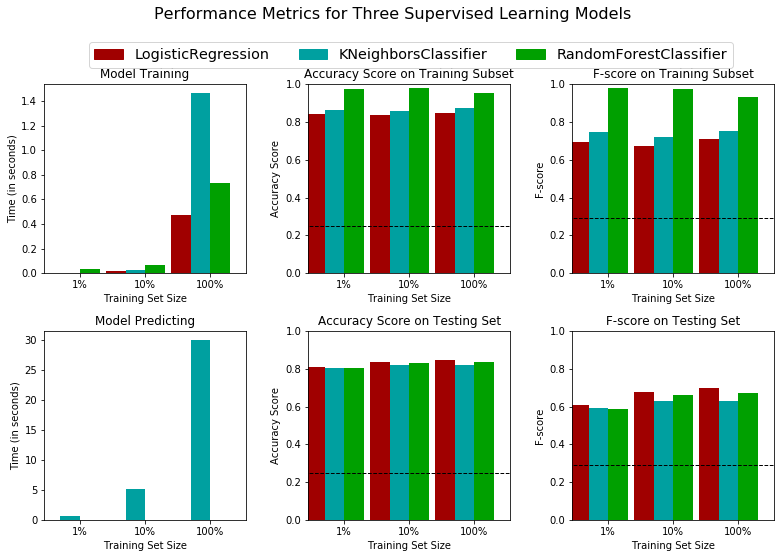

In [12]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
#clf_A = DecisionTreeClassifier()
#clf_B = GaussianNB() F-score is too low
clf_A=RandomForestClassifier(random_state=0)
clf_B = LogisticRegression()
#clf_C=SVC(kernel="rbf") too slowwww
clf_C=KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(.01*X_train.shape[0])
samples_10 = int(.1*X_train.shape[0])
samples_100 = int(1*X_train.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **
### Metrics

#### Processing Time

From the charts of model training time and predicting time, we can see that KNN (in teal color) is the most time-consuming method among all three models, especially when the size of training dataset increases to the full amount – 36,771. When trained on the full training dataset, random forest (RF) is the second slowest and logistic regression is the fastest. 

#### Accuracy

**RF** yields the highest accuracy score, above 0.9, on training set in all three cases with different size of training set. However, the accuracy score of RF decreases slightly when using the full training set. RF is able to achieve an almost 1.0 accuracy score when training on the smaller training set (10%). Both **KNN** and **logistic regression** have accuracy scores above 0.8 and below 0.9 on training set. The fluctuation of accuracy scores given different dataset size is hardly discernible in both cases for KNN and logistic regression.

When it comes to testing, **RF** does not have any considerably higher accuracy score than the other two models. All models manage to provide accuracy scores slightly above 0.8 (but well below 0.85) in all three cases given different training size. The chart of accuracy score on testing set also indicates that larger size of training set could improve the accuracy score on testing set since the accuracy scores of both **logistic regression** and **RF** go up a bit when the training set size increases.

#### F-Score

As mentioned in the previous section, F-0.5 score emphasizes precision. Given considerably high accuracy score that **RF** has on training set, the F-0.5 score on training set of RF model is also remarkably higher – reaching 1 – than those of KNN and logistic regression. However, when the training size increases, the F-0.5 score of RF on training set decreases; nevertheless, the F-0.5 scores on training set of RF are all above 0.85 (probably 0.9). In comparison, **KNN** yields F-0.5 scores above 0.7 while **logistic regression** manages to provide F-0.5 scores that fluctuate around 0.7 on training set. Interestingly, both KNN and logistic regression have the lowest F-0.5 scores on training set with 10% training data and similar scores with 1% and 100% training data. 

On testing set, **logistic regression** has the best F-0.5 score, which is still below 0.8 but seems to be at around 0.7, with a 100% training set. **RF** has the second-best F-0.5 score (hardly reaching 0.7) when training on 10% and 100% training data.

### Suitability and Conclusion

Although **logistic regression** has higher accuracy scores on both training and testing sets, the 103 features used in the model might violate the assumption – independence of predictors. However, logistic regression could be used as a referencing model. **KNN** takes too much computation time and needs to store all the data for prediction. Therefore, **RF** is the most suitable model and it does yield the second-best scores in most cases on testing set. 


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

Briefly speaking, a random forest (RF) model is trained by building multiple decision tree models with subsets of the training sample given different sets of predictors. Then, the RF model makes prediction by either averaging the results or taking the majority of results from all the tree models. And there is a well-explained [introductory example](https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/) illustrated by Tavish Srivastava about how a RF model is trained and makes prediction.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [17]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0) # 0.8376|0.6713 vs. 0.8427|0.7115
# clf=LogisticRegression()       0.8483|0.6993 vs. 0.8483|0.6993
# clf=KNeighborsClassifier()     0.8201|0.6317 vs. 0.8323|0.6623

# TODO: Create the parameters list you wish to tune
## For RF
parameters = {'min_samples_split':[2,5,10,15],'n_estimators':[5,10,15], 'max_depth':[2,3,4,5], 'random_state':[5,10,15]}

## For Logistic Regression
# parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag']}

## For KNN
# parameters = {'n_neighbors':[2,5,10,15,20],'weights':['uniform','distance']}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8376
F-score on testing data: 0.6713

Optimized Model
------
Final accuracy score on the testing data: 0.8427
Final F-score on the testing data: 0.7115


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |         0.2478      |     0.8376        |     0.8427      |
| F-score        |         0.2917      |     0.6713        |     0.7115      |


**Answer: **

The accuracy score of the optimized model roughly increases by 1% while the F-score of the optimized model increases by 4%; hence the optimization has slightly improved the performance of the model in terms of the two measurements. However, given the number of parameters participated in the tuning process, this degree of improvement is not very satisfactory. 

Compared with the naïve predictor benchmarks, the optimized model indeed has an accuracy score 3.4 times higher and a F-0.5 score 2.44 times higher than the benchmark values. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**
The five most important features for prediction are ranked in a descending order (from the most to the least):
1. **Capital gain**: this feature indicates that the person has sold an investment at a value higher than the purchasing price. However, the point of this feature is that the person has earned the regular income that is high enough to make investment. The ability to make investment, regardless gain or loss, can strongly imply a relatively high income level.  
2. **Capital loss**: this feature is chosen for the same reason as the first one: capital loss indicates the person has made investment. Making investment might imply that the person earns a relatively high income which can first pay off everything (rent/mortgage and tax) and enables the person to use the leftover for investment.
3. **Age**: in general, the older, the more experienced and hence the more likely the person has a higher earning power. Normally, the salary will rise gradually throughout a person’s career. The reason for ranking age after capital gain and capital loss is that salary will increase as a person get older and more experienced, but there is no guarantee that the salary will increase to or higher than $50,000 considering the type of occupation. 
4. **Occupation**: some occupations pay more than others. For example, we might expect that a sales person will earn more than a cleaner.
5. **Education level**: the higher the education level, the more likely a person receives a high starting salary (although it depends on the type of occupation). Given a higher base, the salaries would keep being higher than those started with a lower base as people develop their careers.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

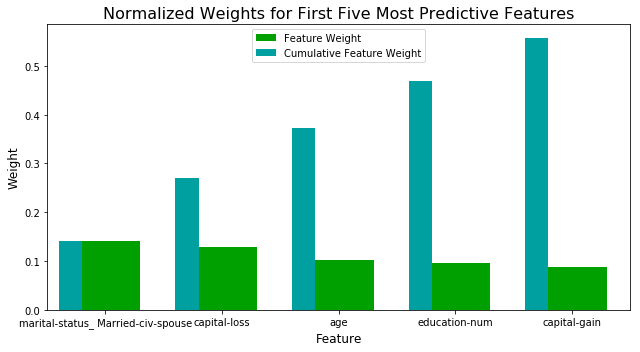

In [36]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

# TODO: Train the supervised model on the training set 
model = GradientBoostingRegressor().fit(X_train, y_train)
#model=RandomForestClassifier(random_state=0).fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

According to the feature importance of the gradient boosting model, marital-status _Married-civ-spouse has the largest feature weight, then followed by capital loss, age, education num and capital gain. I was focused on the factors in work, such as age, occupation and work status, when picking the relevant features; so, I am quite surprised to see that one particular marital status would take the first place as the most relevant feature for prediction. Other than the marital status, the other four features picked by the model are similar to the ones I picked. Interestingly, capital loss is the second most relevant feature.

The visualization confirms my thoughts: age, capital loss and capital gain are among the most relevant and same from my pick while education num is the numeric version of education level which is encoded into various dummy variables. Occupation is included since it is also encoded into all unique dummy variables and none of the individual occupation would be a strong indicator for an income of at least $50,000.  For marital-status_Married-civ-spouse, as mentioned before, is the major difference. “Civ” means civil union and thus this feature implies that people that are married and potentially live with their spouse can be strongly linked to a higher income. Maybe, in 1994, such a marital status means stability in the household and strong motivation to earn and feed the family. 


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [37]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
# argsort ::-1 --> descending order
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8427
F-score on testing data: 0.7115

Final Model trained on reduced data
------
Accuracy on testing data: 0.8505
F-score on testing data: 0.7179


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

The F-score and accuracy score of final model trained on five features got slightly improved from the ones of the model trained on full data. Hence, if training time was a factor, I would definitely consider using the reduced data as the training set given not only the shortened training time but also the improved scores. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.